In [1]:
import sys
sys.path.append("/home/sardarchitect/repos/fscoreai-ml/")

In [2]:
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from sample_data import sample_data
from fscoreai.linear_model import linear_regression
from fscoreai.utils import utils

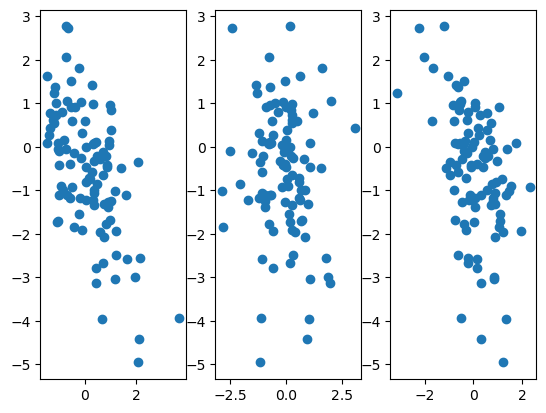

In [4]:
X, y = sample_data.simulate_multilinear_data()
X.shape, y.shape

num_features = X.shape[1]

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X[:, d], y)

plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

100%|██████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 34639.42it/s]



--------------
SkLearn Weights: 

[-0.46562813] [[-0.94012089 -0.10335084 -0.67042832]]
--------------


--------------
Statistical Weights: 

[-0.46562813] [[-0.94012089]
 [-0.10335084]
 [-0.67042832]]
--------------


--------------
Gradient Descent Weights: 

[-0.46562813] [[-0.9401209 ]
 [-0.10335085]
 [-0.6704283 ]]
--------------



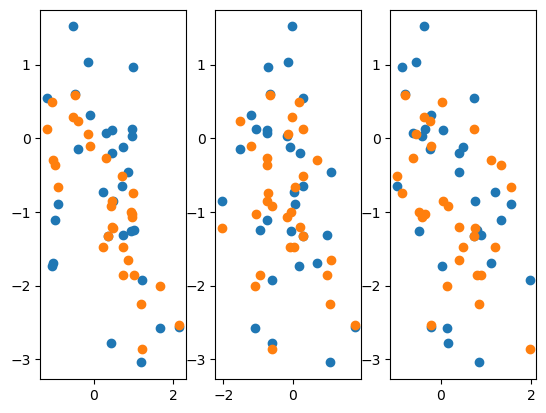

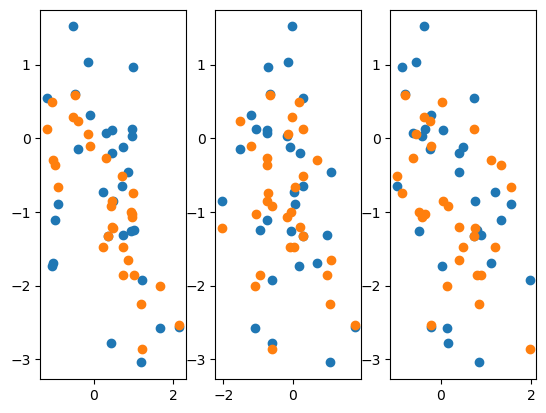

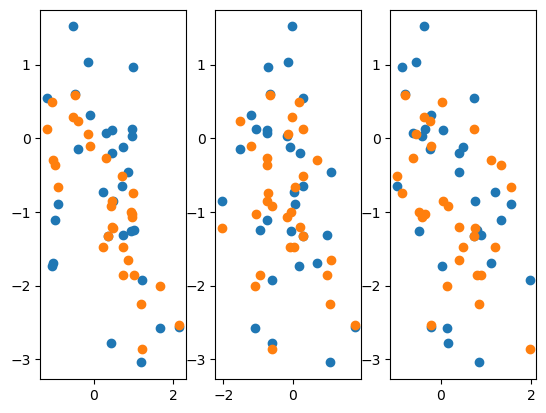

In [6]:
model_0 = LinearRegression()
model_0.fit(X_train, y_train)
y_pred_0 = model_0.predict(X_test)

model_1 = linear_regression.LinearRegression()
model_1.fit_statistical(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

model_2 = linear_regression.LinearRegression()
model_2.fit(X_train, y_train, lr=1e-4, epochs=100000)
y_pred_2 = model_2.predict(X_test)

print("\n--------------")
print("SkLearn Weights: \n")
print(model_0.intercept_, model_0.coef_)
print("--------------\n")

print("\n--------------")
print("Statistical Weights: \n")
print(model_1.intercept_, model_1.coef_)
print("--------------\n")

print("\n--------------")
print("Gradient Descent Weights: \n")
print(model_2.intercept_, model_2.coef_)
print("--------------\n")

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X_test[:, d], y_test)
    axs[d].scatter(X_test[:, d], y_pred_0)

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X_test[:, d], y_test)
    axs[d].scatter(X_test[:, d], y_pred_1)

fig, axs = plt.subplots(nrows=1, ncols=3)
for d in range(num_features):
    axs[d].scatter(X_test[:, d], y_test)
    axs[d].scatter(X_test[:, d], y_pred_2)

plt.show()

In [7]:
a = np.array([[ 3.84305282,  5.85540634,  1.34679585, -2.30944547, -0.91812897,
    -1.5900476 , -1.19033388,  0.68946864, -2.29437608,  1.37138265,
     0.99107096,  1.19243385,  1.34343534,  1.3212232 ,  2.2081419 ],
   [-3.64221525, -1.85831677, -0.41928278,  0.90282337,  1.64831909,
    -1.47685588,  4.80267432,  0.12060631,  1.56508166, -0.41184103,
     0.178994  , -0.6938113 ,  5.38175905, -1.13830171,  1.78628003]])

b = np.array([[ 5.08419105,  5.54174599,  0.98403395, -2.1016293 , -1.51853519,
    -0.67200586,  1.1375822 ,  0.38584016, -3.07862204, -0.54330592,
     2.16292175,  1.49862194,  1.06518289,  0.32603625,  2.23604564],
   [-3.55431546, -2.22426342,  0.41081741,  2.20431978,  2.50025398,
    -2.37324654,  3.52377817,  0.54048704,  1.68813355, -0.87675301,
     0.92399089, -3.22339077,  6.84839793, -2.2338433 ,  2.86227653]])

In [10]:
from sklearn.preprocessing import normalize
norm_sklearn_a = normalize(a, norm='l2')
norm_sklearn_b=  normalize(b, norm='l2')
norm_sklearn_a, norm_sklearn_b

(array([[ 0.43117537,  0.6569535 ,  0.15110518, -0.25911067, -0.10301045,
         -0.17839707, -0.13355077,  0.07735566, -0.25741995,  0.15386372,
          0.11119425,  0.13378637,  0.15072815,  0.14823603,  0.24774481],
        [-0.40155334, -0.20487897, -0.04622582,  0.09953606,  0.18172678,
         -0.162823  ,  0.52949367,  0.01329682,  0.17254987, -0.04540537,
          0.01973404, -0.07649253,  0.59333762, -0.12549749,  0.19693694]]),
 array([[ 0.53867015,  0.5871481 ,  0.10425842, -0.22266767, -0.16088884,
         -0.07119903,  0.12052686,  0.04087977, -0.32618007, -0.05756327,
          0.2291616 ,  0.15877903,  0.11285615,  0.03454355,  0.23690908],
        [-0.32159924, -0.20125435,  0.03717131,  0.19944982,  0.22622634,
         -0.21473454,  0.31883619,  0.04890399,  0.15274459, -0.07932979,
          0.08360394, -0.29165673,  0.61965226, -0.20212115,  0.25898263]]))

In [11]:
norm_a = utils.normalize(a)
norm_b=  utils.normalize(b)
norm_a, norm_b

(array([[ 0.43117537,  0.6569535 ,  0.15110518, -0.25911067, -0.10301045,
         -0.17839707, -0.13355077,  0.07735566, -0.25741995,  0.15386372,
          0.11119425,  0.13378637,  0.15072815,  0.14823603,  0.24774481],
        [-0.40155334, -0.20487897, -0.04622582,  0.09953606,  0.18172678,
         -0.162823  ,  0.52949367,  0.01329682,  0.17254987, -0.04540537,
          0.01973404, -0.07649253,  0.59333762, -0.12549749,  0.19693694]]),
 array([[ 0.53867015,  0.5871481 ,  0.10425842, -0.22266767, -0.16088884,
         -0.07119903,  0.12052686,  0.04087977, -0.32618007, -0.05756327,
          0.2291616 ,  0.15877903,  0.11285615,  0.03454355,  0.23690908],
        [-0.32159924, -0.20125435,  0.03717131,  0.19944982,  0.22622634,
         -0.21473454,  0.31883619,  0.04890399,  0.15274459, -0.07932979,
          0.08360394, -0.29165673,  0.61965226, -0.20212115,  0.25898263]]))

In [14]:
from numpy.testing import assert_almost_equal

In [16]:
print(assert_almost_equal(norm_a, norm_sklearn_a))

None
